### Importing Required Modules

In [12]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import quandl
import datetime as dt

In [13]:
aapl = pdr.get_data_yahoo('AAPL',start=dt.datetime(2006,10,1),end=dt.datetime(2012,1,1))

### Understanding and Cleaning Data

In [14]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,10.838572,10.614285,10.728572,10.694285,178159800,9.283074
2006-10-03,10.707143,10.455714,10.635715,10.582857,197677200,9.186352
2006-10-04,10.780000,10.451428,10.585714,10.768572,207270700,9.347562
2006-10-05,10.880000,10.590000,10.647142,10.690000,170970800,9.279355
2006-10-06,10.720000,10.544286,10.631429,10.602858,116739700,9.203714


In [15]:
aapl.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-12-23,57.655716,57.070000,57.098572,57.618572,67349800,50.015266
2011-12-27,58.441429,57.574287,57.585712,58.075714,66269000,50.412094
2011-12-28,58.321430,57.334286,58.127144,57.520000,57165500,49.929707
2011-12-29,57.950001,57.215714,57.628571,57.874287,53994500,50.237251
2011-12-30,58.040001,57.641430,57.644287,57.857143,44915500,50.222366


In [16]:
aapl.index

DatetimeIndex(['2006-10-02', '2006-10-03', '2006-10-04', '2006-10-05',
               '2006-10-06', '2006-10-09', '2006-10-10', '2006-10-11',
               '2006-10-12', '2006-10-13',
               ...
               '2011-12-16', '2011-12-19', '2011-12-20', '2011-12-21',
               '2011-12-22', '2011-12-23', '2011-12-27', '2011-12-28',
               '2011-12-29', '2011-12-30'],
              dtype='datetime64[ns]', name='Date', length=1323, freq=None)

In [17]:
ts = aapl['Close'][-10:]

In [18]:
sample = aapl.sample(20)
sample

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-30,46.501427,46.150002,46.497143,46.237144,39373600,40.135727
2008-11-20,12.350000,11.428572,12.177143,11.498571,429203600,9.981230
2008-08-19,25.295713,24.544285,24.934286,24.790001,154051100,21.518728
2008-03-11,18.211428,17.428572,17.728571,18.192858,290985800,15.792146
2011-07-25,57.142857,55.660000,55.764286,56.928570,147451500,49.416325
2010-10-20,44.892857,43.838570,44.142857,44.361427,180406100,38.507534
2010-08-23,36.000000,35.035713,35.970001,35.114285,103510400,30.480627
2011-03-09,50.680000,50.085712,50.669998,50.352856,113326500,43.708332
2008-07-08,25.671429,24.677143,25.057142,25.650000,222087600,22.265249


In [19]:
monthly_aapl = aapl.resample('M').mean()
monthly_aapl

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-31,11.123766,10.893117,11.002922,11.017987,1.634995e+08,9.564062
2006-11-30,12.314626,12.028980,12.161565,12.192109,1.647010e+08,10.583248
2006-12-31,12.546500,12.205571,12.415857,12.353071,2.111349e+08,10.722971
2007-01-31,12.880857,12.522572,12.722357,12.697357,3.401223e+08,11.021825
2007-02-28,12.382932,12.111804,12.252105,12.246842,1.805573e+08,10.630759
...,...,...,...,...,...,...
2011-08-31,54.550000,53.021304,53.894347,53.823230,1.754630e+08,46.720762
2011-09-30,56.745918,55.438096,56.054217,56.070476,1.425887e+08,48.671463
2011-10-31,57.402380,55.932245,56.677687,56.747143,1.564456e+08,49.258838


In [20]:
price_diff = aapl['Close'] - aapl['Open']

### Exploratory Data Analysis

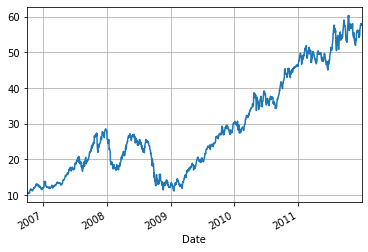

In [21]:
aapl['Close'].plot(grid=True)
plt.show()

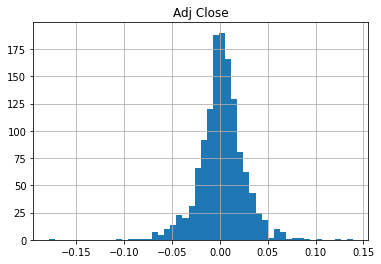

In [22]:
daily_close = aapl[['Adj Close']]

# Daily returns
daily_pct_change = daily_close.pct_change()

# Replace NA values with 0
daily_pct_change.fillna(0, inplace=True)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

#Plotting Daily pct_change
daily_pct_change.hist(bins=50)

plt.show()

In [23]:
#Calculating Cumalative Daily Rate of Return
cum_daily_return = (1+daily_pct_change).cumprod()
cum_daily_return

,Adj Close
Date,
2006-10-02,1.000000
2006-10-03,0.989581
2006-10-04,1.006947
2006-10-05,0.999599
2006-10-06,0.991451
...,...
2011-12-23,5.387791
2011-12-27,5.430539
2011-12-28,5.378574


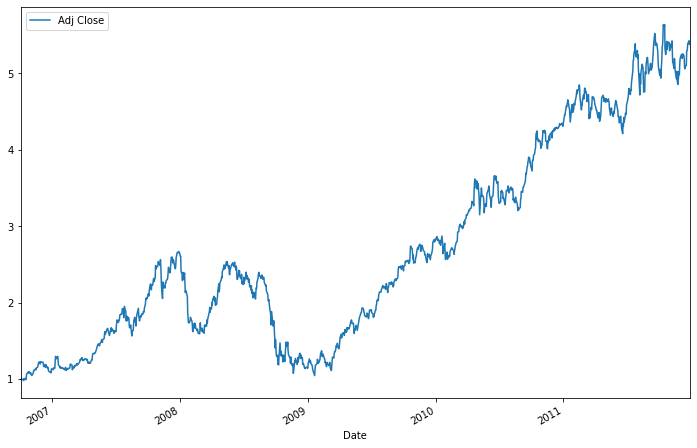

In [24]:
cum_daily_return.plot(figsize=(12,8))

plt.show()

In [25]:
def get_stock_data(tickers,start_date,end_date):
    '''
    Function takes in a list of stock symbol alongside start date and end date and returns
    a dataframe containing the stock information
    '''
    def data(ticker):
        return (pdr.get_data_yahoo(ticker,start=start_date,end=end_date))

    datas = map(data,tickers)

    return (pd.concat(datas,keys=tickers,names=['Ticker','Data']))

                         High         Low        Open       Close  \
Ticker Data                                                         
AAPL   2006-10-02   10.838572   10.614285   10.728572   10.694285   
       2006-10-03   10.707143   10.455714   10.635715   10.582857   
       2006-10-04   10.780000   10.451428   10.585714   10.768572   
       2006-10-05   10.880000   10.590000   10.647142   10.690000   
       2006-10-06   10.720000   10.544286   10.631429   10.602858   
...                       ...         ...         ...         ...   
GOOG   2011-12-23  316.154968  314.102661  314.819977  315.387848   
       2011-12-27  321.041656  314.819977  314.844879  318.929565   
       2011-12-28  321.295715  317.858582  320.174896  318.655609   
       2011-12-29  320.299438  316.414001  319.547272  320.000549   
       2011-12-30  322.172424  319.811279  319.811279  321.744019   

                        Volume   Adj Close  
Ticker Data                                 
AAPL   2006-

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  i

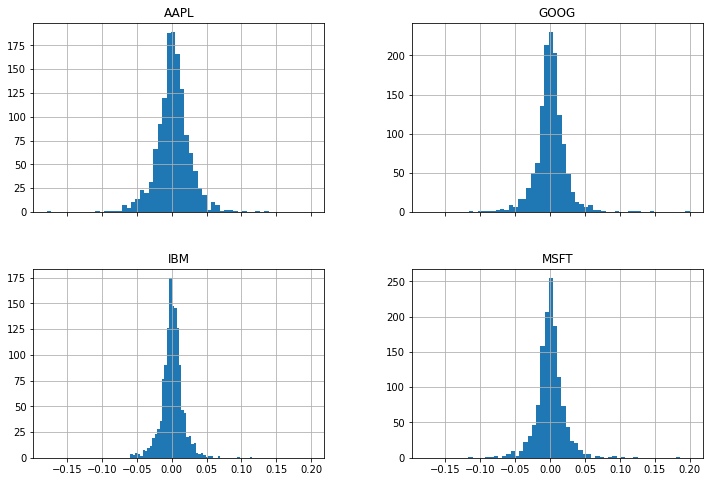

In [36]:
tickers = ['AAPL','MSFT','IBM','GOOG']

all_data = get_stock_data(tickers,dt.datetime(2006,10,1),dt.datetime(2012,1,1))

print(all_data)

daily_close_price = all_data[['Adj Close']].reset_index().pivot('Data', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_price.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

#### Moving Windows

In [29]:
#Get the adjusted closing prices
adj_close_price = aapl['Adj Close']

#Calculate the moving average
moving_avg = adj_close_price.rolling(window=40).mean()

#### Calculate Voltality

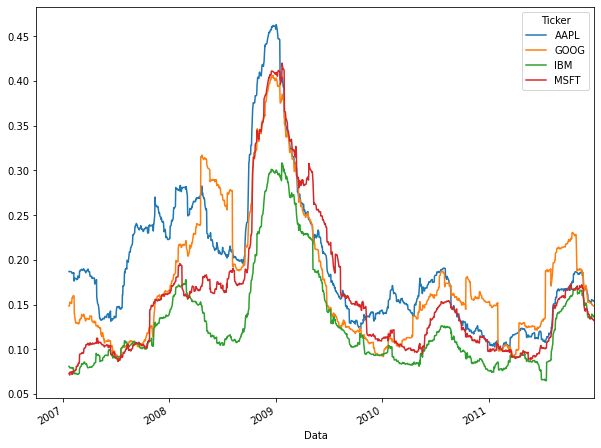

In [37]:
min_periods = 75

votality = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

votality.plot(figsize=(10,8))
plt.show()

## Simple Moving Average

In [43]:
short_window, long_window = 40,100

signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

#Creating a short simple moving average over the short window
signals['Short_mAvg'] = aapl['Close'].rolling(window=short_window,min_periods=1, center=False).mean()

#Creating a long simple moving average over the long window
signals['Long_mAvg'] = aapl['Close'].rolling(window=long_window,min_periods=1, center=False).mean()

#Creates a signal for when the SMA crosses the LMA
signals['signal'][short_window:] = np.where(signals['Short_mAvg'][short_window:] 
                                           > signals['Long_mAvg'][short_window:], 1.0,0.0)
    
#Generate Trading orders by taking the difference
signals['positions'] = signals['signal'].diff()

signals

,signal,Short_mAvg,Long_mAvg,positions
Date,,,,
2006-10-02,0.0,10.694285,10.694285,NaN
2006-10-03,0.0,10.638571,10.638571,0.0
2006-10-04,0.0,10.681905,10.681905,0.0
2006-10-05,0.0,10.683928,10.683928,0.0
2006-10-06,0.0,10.667714,10.667714,0.0
...,...,...,...,...
2011-12-23,1.0,55.439643,55.406957,0.0
2011-12-27,0.0,55.445286,55.448614,-1.0
2011-12-28,0.0,55.437643,55.490072,0.0


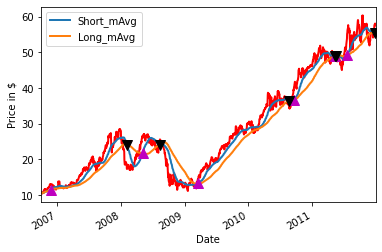

In [47]:
# Initialize the plot figure
fig = plt.figure(fig)

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['Short_mAvg', 'Long_mAvg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.Short_mAvg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.Short_mAvg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()